<a href="https://colab.research.google.com/github/wonkwonlee/a2w-kma-big-data-contest/blob/main/ASOS_Merge_Corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 경로 설정 
import os
os.chdir('/content/drive/MyDrive/Meteorological_Agency_Bigdata_Contest')

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import glob
import sys

In [ ]:
# 연도별 지역별로 csv 병합

input_path = "../Merged/"

# 연도별 CSV 병합시키는 함수
def combine(year):
  # ASOS_DAY_로 시작하는 연도별 모든 지역 csv 파일
  all_files = glob.glob(os.path.join(input_path,'ASOS_DAY_' + year + '_*'))
  
  all_data_frames = []
  # 각 파일 별 데이터프레임을 all_data_frames에 저장
  for file in all_files:
    data_frame = pd.read_csv(file, index_col=None)
    all_data_frames.append(data_frame)
  # concat을 이용해 세로로 결합
  data_frame_concat = pd.concat(all_data_frames, axis=0, ignore_index=True)
  # CSV output 저장 
  data_frame_concat.to_csv("data/asos/ASOS_all_" + year + ".csv", index=False, encoding='utf-8-sig')

In [ ]:
# 2011부터 2019년까지 각각 combine
for i in range(2011, 2020):
  combine(str(i))

ValueError: ignored

In [ ]:
# 연도별 csv를 합쳐서 단일 파일의 2011년부터 19년까지의 ASOS csv 생성

all_files = glob.glob(os.path.join("data/asos/",'ASOS_all_*'))

merged_asos = []
for file in all_files:
  data_frame = pd.read_csv(file, index_col=None)
  merged_asos.append(data_frame)
merged_asos_concat = pd.concat(merged_asos, axis=0, ignore_index=True)
merged_asos_concat.to_csv("data/asos/ASOS_merged.csv", index=False, encoding='utf-8-sig')

In [ ]:
# 101895 rows × 62 columns

asos_df = pd.read_csv("data/asos/ASOS_merged.csv")
asos_df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (60) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,115,울릉도,2011-01-01,0.8,-1.1,352.0,2.1,1505.0,NaN,NaN,NaN,NaN,19.33,28.0,29.4,70.0,926.0,19.0,70.0,934.0,11.1,9551.0,70.0,-1.9,65.0,54.0,82.5,5.3,986.0,1022.4,2348.0,1003.9,534.0,1013.2,9.6,0.3,NaN,NaN,NaN,21.9,650.0,48.4,650.0,24.2,9.4,9.4,0.1,-0.3,1.8,2.1,3.0,2.9,3.4,7.3,10.8,14.5,14.7,NaN,0.5,5.8,-{눈}-{눈}{강도0}0300-{소낙눈}0420-{시정(미만)}{1km}{소낙눈}...,NaN
1,115,울릉도,2011-01-02,0.1,-0.9,2119.0,1.3,1.0,NaN,NaN,NaN,NaN,22.83,24.8,14.5,50.0,55.0,8.5,70.0,929.0,6.0,5147.0,70.0,-1.2,65.0,28.0,91.5,5.6,996.1,1025.9,1010.0,1022.1,2400.0,1023.8,9.6,0.6,NaN,NaN,NaN,24.6,2355.0,49.5,2355.0,27.5,9.4,9.4,0.1,-0.3,1.7,2.1,2.9,2.8,3.2,7.2,10.7,14.4,14.7,NaN,0.4,29.7,{박무}2310-{박무}{강도1}2400- {눈}0110-{눈}{강도0}0300-{...,NaN
2,115,울릉도,2011-01-03,-0.3,-1.4,543.0,0.8,1313.0,NaN,NaN,NaN,NaN,12.83,7.5,15.9,50.0,713.0,10.2,70.0,736.0,6.5,5648.0,70.0,-3.4,61.0,2356.0,80.3,4.8,992.4,1022.1,0.0,1017.5,2341.0,1020.0,9.7,2.8,NaN,NaN,NaN,4.7,725.0,51.9,230.0,5.7,8.8,8.8,0.1,-0.3,1.6,2.0,2.8,2.7,3.2,7.0,10.6,14.4,14.7,NaN,1.1,0.3,-{박무}-{박무}{강도1}0300-0520. -{눈}-{눈}{강도0}0300-{눈...,NaN
3,115,울릉도,2011-01-04,1.7,0.4,31.0,3.9,1316.0,NaN,NaN,NaN,NaN,NaN,NaN,11.2,50.0,338.0,6.8,70.0,905.0,3.1,2709.0,70.0,-4.5,53.0,1300.0,63.1,4.4,989.8,1017.9,1007.0,1016.0,1409.0,1017.1,9.7,3.2,NaN,NaN,NaN,NaN,NaN,40.0,0.0,NaN,7.4,7.4,0.1,-0.2,1.6,2.0,2.7,2.6,3.1,6.9,10.5,14.4,14.7,NaN,2.3,NaN,NaN,NaN
4,115,울릉도,2011-01-05,1.2,-1.2,1901.0,2.6,310.0,NaN,NaN,NaN,NaN,7.25,1.8,13.9,290.0,1059.0,6.9,270.0,751.0,4.1,3534.0,250.0,-5.4,42.0,1556.0,61.5,4.1,987.0,1016.3,3.0,1012.5,1334.0,1014.3,9.7,0.2,NaN,NaN,NaN,1.7,2355.0,30.0,0.0,2.3,8.5,7.5,0.1,-0.4,1.6,1.9,2.6,2.5,3.0,6.8,10.5,14.4,14.8,NaN,0.7,12.3,{눈}1340-{눈}{강도0}1500-{눈}{강도0}1800-{소낙눈}1840-{눈...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101890,295,남해,2019-12-27,3.3,-1.9,2349.0,7.4,1432.0,NaN,NaN,NaN,NaN,NaN,NaN,5.8,290.0,510.0,3.4,320.0,1251.0,1.8,1567.0,290.0,-6.4,30.0,1329.0,50.0,3.8,1018.0,1027.5,2255.0,1017.7,1.0,1023.7,9.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,0.3,2.1,-3.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101891,295,남해,2019-12-28,2.2,-1.9,510.0,8.1,1543.0,NaN,NaN,NaN,NaN,NaN,NaN,2.7,320.0,1106.0,1.6,290.0,1042.0,0.9,782.0,250.0,-5.9,33.0,1531.0,56.1,3.9,1023.2,1030.5,2323.0,1027.3,3.0,1029.0,9.8,8.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,0.0,1.4,-2.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101892,295,남해,2019-12-29,3.2,-0.5,308.0,5.8,1513.0,NaN,NaN,NaN,NaN,NaN,8.5,2.6,200.0,1229.0,1.4,290.0,1121.0,0.8,733.0,270.0,-0.9,53.0,1118.0,75.8,5.9,1020.9,1030.2,1.0,1022.7,2356.0,1026.6,9.8,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,6.8,3.5,-2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101893,295,남해,2019-12-30,6.8,3.6,2400.0,12.6,1552.0,NaN,NaN,NaN,NaN,NaN,0.5,6.1,270.0,2210.0,3.4,290.0,1802.0,1.2,1049.0,270.0,3.1,50.0,2140.0,78.9,7.8,1016.4,1024.6,2344.0,1020.0,1500.0,1022.0,9.9,2.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.3,4.3,6.6,1.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 날짜 순 정렬 및 지역 코드 순서대로 정렬
# 울릉도, 울진, 안동, 상주, 포항, 대구, 울산, 창원, 부산, 김해시, 북창원, 양산시, 의령군, 함양군, 봉화
# 영주, 문경, 통영, 진주, 청송군, 영덕, 의성, 구미, 영천, 경주시, 거창, 합천, 밀양, 산청, 거제, 남해

asos_df_sorted = asos_df.sort_values(by=['tm', 'stnId'], ignore_index=True)
asos_df_sorted

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,115,울릉도,2011-01-01,0.8,-1.1,352.0,2.1,1505.0,NaN,NaN,NaN,NaN,19.33,28.0,29.4,70.0,926.0,19.0,70.0,934.0,11.1,9551.0,70.0,-1.9,65.0,54.0,82.5,5.3,986.0,1022.4,2348.0,1003.9,534.0,1013.2,9.6,0.3,NaN,NaN,NaN,21.9,650.0,48.4,650.0,24.2,9.4,9.4,0.1,-0.3,1.8,2.1,3.0,2.9,3.4,7.3,10.8,14.5,14.7,NaN,0.5,5.8,-{눈}-{눈}{강도0}0300-{소낙눈}0420-{시정(미만)}{1km}{소낙눈}...,NaN
1,130,울진,2011-01-01,-1.0,-7.0,132.0,2.3,1018.0,NaN,NaN,NaN,NaN,15.25,8.5,20.2,320.0,958.0,12.3,320.0,953.0,6.0,5208.0,290.0,-4.5,40.0,0.0,79.0,4.6,1011.7,1024.5,2340.0,1011.1,532.0,1017.7,9.7,0.9,NaN,NaN,NaN,7.3,1200.0,7.3,1200.0,8.7,8.8,8.4,-1.5,-8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{눈}0620-{눈}{강도1}0900-{눈}{강도0}1200-{눈}{강도0}1500...,NaN
2,136,안동,2011-01-01,-4.5,-11.0,330.0,2.9,1506.0,NaN,NaN,NaN,NaN,NaN,NaN,7.4,270.0,1429.0,4.4,270.0,1431.0,2.1,1777.0,290.0,-11.6,41.0,1509.0,58.8,2.6,1002.4,1026.5,2358.0,1015.3,12.0,1020.4,9.7,6.9,1200.0,1.85,9.93,NaN,NaN,NaN,NaN,NaN,2.8,1.5,-4.1,-13.6,-2.4,-2.0,-0.6,0.2,2.2,6.0,NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN
3,137,상주,2011-01-01,-5.2,-9.9,443.0,0.5,1445.0,NaN,NaN,NaN,NaN,NaN,NaN,9.8,250.0,1003.0,5.3,250.0,855.0,3.3,2870.0,250.0,-14.1,36.0,1451.0,50.0,2.1,1008.9,1027.2,2356.0,1016.3,47.0,1021.6,9.7,7.0,NaN,NaN,NaN,NaN,NaN,2.4,0.0,NaN,2.5,0.6,-3.2,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,138,포항,2011-01-01,-0.6,-6.2,432.0,5.2,1525.0,NaN,NaN,NaN,NaN,NaN,NaN,11.1,230.0,538.0,4.7,250.0,117.0,2.8,2384.0,250.0,-10.2,39.0,1517.0,48.1,2.9,1017.7,1024.1,2342.0,1012.6,107.0,1017.9,9.8,3.2,1200.0,1.44,7.08,NaN,NaN,NaN,NaN,NaN,6.1,5.5,-1.3,-7.6,0.5,1.1,3.1,4.3,5.9,11.1,12.5,17.3,17.8,NaN,1.9,NaN,{햇무리}1520-1630.,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101890,285,합천,2019-12-31,-1.5,-6.9,2345.0,2.9,1523.0,NaN,NaN,NaN,NaN,NaN,NaN,10.2,290.0,347.0,4.6,320.0,443.0,1.8,1590.0,290.0,-14.3,18.0,1140.0,40.6,2.1,1027.7,1034.1,910.0,1024.8,27.0,1031.8,9.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,0.8,0.1,-6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101891,288,밀양,2019-12-31,-1.1,-4.5,2313.0,4.6,2.0,NaN,NaN,NaN,NaN,NaN,NaN,11.7,360.0,510.0,7.0,340.0,451.0,2.9,2482.0,320.0,-18.7,14.0,1322.0,26.4,1.5,1029.1,1033.1,1005.0,1022.4,1.0,1030.6,9.8,7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.5,-12.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101892,289,산청,2019-12-31,-2.5,-5.1,756.0,1.2,1.0,NaN,NaN,NaN,NaN,NaN,NaN,21.0,320.0,343.0,10.4,290.0,248.0,5.8,4996.0,290.0,-16.4,22.0,1317.0,34.9,1.8,1014.2,1034.4,936.0,1025.4,33.0,1031.9,9.8,5.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4,0.4,-1.2,-7.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101893,294,거제,2019-12-31,0.7,-1.5,2329.0,6.7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,10.3,320.0,532.0,4.7,320.0,541.0,2.4,2113.0,290.0,-11.6,25.0,1336.0,40.1,2.6,1024.9,1033.5,1037.0,1022.7,1.0,1030.8,9.9,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,0.0,1.1,-7.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 날씨 데이터 타입 변환

asos_df_sorted['tm'] = pd.to_datetime(asos_df_sorted['tm'])
asos_df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101895 entries, 0 to 101894
Data columns (total 62 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   stnId           101895 non-null  int64         
 1   stnNm           101895 non-null  object        
 2   tm              101895 non-null  datetime64[ns]
 3   avgTa           101811 non-null  float64       
 4   minTa           101885 non-null  float64       
 5   minTaHrmt       101887 non-null  float64       
 6   maxTa           101881 non-null  float64       
 7   maxTaHrmt       101881 non-null  float64       
 8   mi10MaxRn       23240 non-null   float64       
 9   mi10MaxRnHrmt   17200 non-null   float64       
 10  hr1MaxRn        23246 non-null   float64       
 11  hr1MaxRnHrmt    17740 non-null   float64       
 12  sumRnDur        10435 non-null   float64       
 13  sumRn           34976 non-null   float64       
 14  maxInsWs        101866 non-null  flo

In [ ]:
asos_df_sorted.to_csv("data/asos/ASOS_final.csv", index=False, encoding='utf-8-sig')

In [ ]:
asos_final = pd.read_csv('ASOS_final.csv')
asos_final.head()

,stnId,stnNm,tm,avgTa,minTa,minTaHrmt,maxTa,maxTaHrmt,mi10MaxRn,mi10MaxRnHrmt,hr1MaxRn,hr1MaxRnHrmt,sumRnDur,sumRn,maxInsWs,maxInsWsWd,maxInsWsHrmt,maxWs,maxWsWd,maxWsHrmt,avgWs,hr24SumRws,maxWd,avgTd,minRhm,minRhmHrmt,avgRhm,avgPv,avgPa,maxPs,maxPsHrmt,minPs,minPsHrmt,avgPs,ssDur,sumSsHr,hr1MaxIcsrHrmt,hr1MaxIcsr,sumGsr,ddMefs,ddMefsHrmt,ddMes,ddMesHrmt,sumDpthFhsc,avgTca,avgLmac,avgTs,minTg,avgCm5Te,avgCm10Te,avgCm20Te,avgCm30Te,avgM05Te,avgM10Te,avgM15Te,avgM30Te,avgM50Te,sumLrgEv,sumSmlEv,n99Rn,iscs,sumFogDur
0,115,울릉도,2011-01-01,0.8,-1.1,352.0,2.1,1505.0,NaN,NaN,NaN,NaN,19.33,28.0,29.4,70.0,926.0,19.0,70.0,934.0,11.1,9551.0,70.0,-1.9,65.0,54.0,82.5,5.3,986.0,1022.4,2348.0,1003.9,534.0,1013.2,9.6,0.3,NaN,NaN,NaN,21.9,650.0,48.4,650.0,24.2,9.4,9.4,0.1,-0.3,1.8,2.1,3.0,2.9,3.4,7.3,10.8,14.5,14.7,NaN,0.5,5.8,-{눈}-{눈}{강도0}0300-{소낙눈}0420-{시정(미만)}{1km}{소낙눈}...,NaN
1,130,울진,2011-01-01,-1.0,-7.0,132.0,2.3,1018.0,NaN,NaN,NaN,NaN,15.25,8.5,20.2,320.0,958.0,12.3,320.0,953.0,6.0,5208.0,290.0,-4.5,40.0,0.0,79.0,4.6,1011.7,1024.5,2340.0,1011.1,532.0,1017.7,9.7,0.9,NaN,NaN,NaN,7.3,1200.0,7.3,1200.0,8.7,8.8,8.4,-1.5,-8.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,{눈}0620-{눈}{강도1}0900-{눈}{강도0}1200-{눈}{강도0}1500...,NaN
2,136,안동,2011-01-01,-4.5,-11.0,330.0,2.9,1506.0,NaN,NaN,NaN,NaN,NaN,NaN,7.4,270.0,1429.0,4.4,270.0,1431.0,2.1,1777.0,290.0,-11.6,41.0,1509.0,58.8,2.6,1002.4,1026.5,2358.0,1015.3,12.0,1020.4,9.7,6.9,1200.0,1.85,9.93,NaN,NaN,NaN,NaN,NaN,2.8,1.5,-4.1,-13.6,-2.4,-2.0,-0.6,0.2,2.2,6.0,NaN,NaN,NaN,NaN,1.7,NaN,NaN,NaN
3,137,상주,2011-01-01,-5.2,-9.9,443.0,0.5,1445.0,NaN,NaN,NaN,NaN,NaN,NaN,9.8,250.0,1003.0,5.3,250.0,855.0,3.3,2870.0,250.0,-14.1,36.0,1451.0,50.0,2.1,1008.9,1027.2,2356.0,1016.3,47.0,1021.6,9.7,7.0,NaN,NaN,NaN,NaN,NaN,2.4,0.0,NaN,2.5,0.6,-3.2,-7.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,138,포항,2011-01-01,-0.6,-6.2,432.0,5.2,1525.0,NaN,NaN,NaN,NaN,NaN,NaN,11.1,230.0,538.0,4.7,250.0,117.0,2.8,2384.0,250.0,-10.2,39.0,1517.0,48.1,2.9,1017.7,1024.1,2342.0,1012.6,107.0,1017.9,9.8,3.2,1200.0,1.44,7.08,NaN,NaN,NaN,NaN,NaN,6.1,5.5,-1.3,-7.6,0.5,1.1,3.1,4.3,5.9,11.1,12.5,17.3,17.8,NaN,1.9,NaN,{햇무리}1520-1630.,NaN


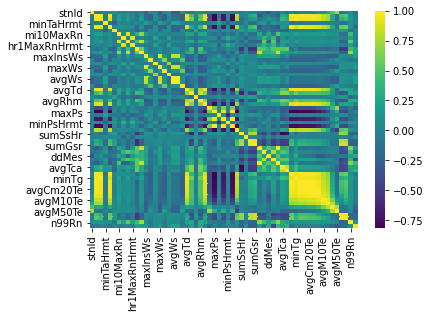

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

asos_corr = asos_final.corr()
sns.heatmap(asos_corr, cmap='viridis')
plt.show()